In [1]:
# Attempt 1

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt

# Step 1: Load the CSV files
csv12 = '/Users/schoudhry/Desktop/IIT/Research/researchData/StableS12.csv'
csv13 = '/Users/schoudhry/Desktop/IIT/Research/researchData/Stable13.csv'
csv1 = '/Users/schoudhry/Desktop/IIT/Research/researchData/Stable1.csv'

# Load gene expression (S12), bacterial abundance (S13), and tumor/no tumor labels (S1)
data_s12 = pd.read_csv(csv12)
data_s13 = pd.read_csv(csv13)
data_s1 = pd.read_csv(csv1)

# Step 2: Extract relevant columns for B01 to B26
patients = [f'B{str(i).zfill(2)}' for i in range(1, 27)]  # B01 to B26

genes_data = data_s12[['Unnamed: 0'] + patients].rename(columns={'Unnamed: 0': 'Gene'})  # Gene expression
bacteria_data = data_s13[['Unnamed: 0'] + patients].rename(columns={'Unnamed: 0': 'Bacteria'})  # Bacterial abundance

# Step 3: Load the CRC status from csv1 (using 'Description' to label tumor=1 and normal=0)
crc_status = data_s1[['Patient_Blind_ID', 'Description']].query("Patient_Blind_ID in @patients")
crc_status['CRC_Status'] = crc_status['Description'].apply(lambda x: 1 if x == 'tumor' else 0)

# Step 4: Merge gene, bacteria, and CRC status data for all patients (B01 to B26)
merged_data = pd.concat([genes_data.set_index('Gene').T, bacteria_data.set_index('Bacteria').T], axis=1)

# Step 5: Convert all columns to numeric, forcing errors to NaN
merged_data = merged_data.apply(pd.to_numeric, errors='coerce')

# Step 6: Check for any remaining non-numeric or NaN values
print("Checking for NaN values in the dataset...")
print(merged_data.isnull().sum())  # Check for NaN values

# Handle missing values (fill NaNs with 0 or use a different strategy)
merged_data.fillna(0, inplace=True)

# Merge with CRC status
merged_data['CRC_Status'] = crc_status.set_index('Patient_Blind_ID')['CRC_Status']

# Step 7: Prepare the input features (X) and target (y)
X = merged_data.drop(columns=['CRC_Status']).values  # Features: gene and bacterial data
y = merged_data['CRC_Status'].values  # Target: CRC status (tumor or no tumor)

# Step 8: Normalize the data (optional but recommended)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 9: Convert everything to float32 (TensorFlow expects float32 data types)
X_scaled = X_scaled.astype(np.float32)
y = y.astype(np.float32)

# Step 10: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 11: Define the neural network model
model = tf.keras.Sequential([
    layers.InputLayer(input_shape=(X_train.shape[1],)),  # Input layer

    # First Dense Layer
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),  # Batch normalization for stable learning
    layers.Dropout(0.3),  # Dropout to prevent overfitting

    # Second Dense Layer
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    # Third Dense Layer
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),

    # Fourth Dense Layer
    layers.Dense(32, activation='relu'),

    # Output Layer (sigmoid for binary classification)
    layers.Dense(1, activation='sigmoid')
])

# Step 12: Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 13: Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Step 14: Visualize the model architecture using plot_model
plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)

# Step 15: Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Step 16: Plot training history (accuracy and loss)
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.show()

# Step 17: Display the saved model plot
from IPython.display import Image
Image('model_architecture.png')  # Show the saved model plot


In [16]:
print(data_s1['Patient_Blind_ID'].unique())


[12337 12423  3600  3792  5691  3566  3874  4771 11808 12379 12372 13796
 14211  1762  1183  1343  1391  1457  1178  2093  1157  2186  2022  1944
  2567  2635  7647  2681  1200  1926  2216  1340  2343  1277  2840  1619
  4571  5741  4044  6470  6645  1552  8567  2853]


In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt

# Step 1: Load the CSV files
csv12 = '/Users/schoudhry/Desktop/IIT/Research/researchData/StableS12.csv'
csv13 = '/Users/schoudhry/Desktop/IIT/Research/researchData/Stable13.csv'
csv1 = '/Users/schoudhry/Desktop/IIT/Research/researchData/Stable1.csv'

# Load gene expression (S12), bacterial abundance (S13), and tumor/no tumor labels (S1)
data_s12 = pd.read_csv(csv12)
data_s13 = pd.read_csv(csv13)
data_s1 = pd.read_csv(csv1)

# Step 2: Extract relevant columns for B01 to B26
patients = [f'B{str(i).zfill(2)}' for i in range(1, 27)]  # B01 to B26

genes_data = data_s12[['Unnamed: 0'] + patients].rename(columns={'Unnamed: 0': 'Gene'})  # Gene expression
bacteria_data = data_s13[['Unnamed: 0'] + patients].rename(columns={'Unnamed: 0': 'Bacteria'})  # Bacterial abundance

# Step 3: Load the CRC status from csv1 (using 'Description' to label tumor=1 and normal=0)
crc_status = data_s1[['Patient_Blind_ID', 'Description']].query("Patient_Blind_ID in @patients")

# Ensure 'Patient_Blind_ID' is treated as string
crc_status['Patient_Blind_ID'] = crc_status['Patient_Blind_ID'].astype(str)

# Use 'Description' to label tumor=1 and normal=0
crc_status['CRC_Status'] = crc_status['Description'].apply(lambda x: 1 if x == 'tumor' else 0)

# Debugging: Print the shape of CRC status to make sure we are selecting the correct patients
print(f"CRC Status Shape: {crc_status.shape}")
print(crc_status.head())

# Step 4: Merge gene, bacteria, and CRC status data for all patients (B01 to B26)
# Transpose the data to align patients as rows
merged_data = pd.concat([genes_data.set_index('Gene').T, bacteria_data.set_index('Bacteria').T], axis=1)

# Debugging: Check the shape and content of merged gene and bacteria data
print(f"Merged Gene and Bacteria Data Shape: {merged_data.shape}")
print(merged_data.head())

# Step 5: Convert all columns to numeric, forcing errors to NaN
merged_data = merged_data.apply(pd.to_numeric, errors='coerce')

# Step 6: Check for any remaining non-numeric or NaN values
print("Checking for NaN values in the dataset...")
print(merged_data.isnull().sum())  # Check for NaN values

# Handle missing values (fill NaNs with 0 or use a different strategy)
merged_data.fillna(0, inplace=True)

# Debugging: Print the merged_data shape after filling NaN values
print(f"Shape after filling NaN values: {merged_data.shape}")

# Merge with CRC status (make sure index alignment is correct)
merged_data = merged_data.merge(crc_status.set_index('Patient_Blind_ID'), left_index=True, right_index=True)

# Debugging: Print the shape after merging with CRC status
print(f"Merged Data Shape after merging with CRC Status: {merged_data.shape}")
print(merged_data.head())

# Step 7: Prepare the input features (X) and target (y)
X = merged_data.drop(columns=['CRC_Status']).values  # Features: gene and bacterial data
y = merged_data['CRC_Status'].values  # Target: CRC status (tumor or no tumor)

# Debugging: Ensure that X and y have samples
print(f"X Shape: {X.shape}, y Shape: {y.shape}")

# Step 8: Normalize the data (optional but recommended)
if X.shape[0] == 0:
    print("No samples available in the dataset after merging. Please check the data sources and merging logic.")
else:
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Step 9: Convert everything to float32 (TensorFlow expects float32 data types)
    X_scaled = X_scaled.astype(np.float32)
    y = y.astype(np.float32)

    # Step 10: Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    # Step 11: Define the neural network model
    model = tf.keras.Sequential([
        layers.InputLayer(input_shape=(X_train.shape[1],)),  # Input layer

        # First Dense Layer
        layers.Dense(256, activation='relu'),
        layers.BatchNormalization(),  # Batch normalization for stable learning
        layers.Dropout(0.3),  # Dropout to prevent overfitting

        # Second Dense Layer
        layers.Dense(128, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.3),

        # Third Dense Layer
        layers.Dense(64, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.2),

        # Fourth Dense Layer
        layers.Dense(32, activation='relu'),

        # Output Layer (sigmoid for binary classification)
        layers.Dense(1, activation='sigmoid')
    ])

    # Step 12: Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Step 13: Train the model
    history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

    # Step 14: Visualize the model architecture using plot_model
    plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)

    # Step 15: Evaluate the model on the test data
    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
    print(f"Test Accuracy: {test_accuracy:.4f}")

    # Step 16: Plot training history (accuracy and loss)
    plt.figure(figsize=(12, 5))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Training and Validation Accuracy')

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training and Validation Loss')

    plt.show()

    # Step 17: Display the saved model plot
    from IPython.display import Image
    Image('model_architecture.png')  # Show the saved model plot


CRC Status Shape: (0, 3)
Empty DataFrame
Columns: [Patient_Blind_ID, Description, CRC_Status]
Index: []
Merged Gene and Bacteria Data Shape: (26, 20312)
     TSPAN6  TNMD  DPM1  SCYL3  C1orf112  FGR   CFH  FUCA2  GCLC  NFYA  ...  \
B01     235    23   184    263        98  111  2291    243   608   325  ...   
B02     815    15   166    389        73  144   902    336   493   349  ...   
B03     351   188   146    185        69  370  2865    242   463   380  ...   
B04     629    12   124    231        70   53  1524    215   495   323  ...   
B05      91     4   150    480       457  287   299    259   458  1050  ...   

     Bacteria;Firmicutes;Bacilli;Lactobacillales;Streptococcaceae;Streptococcus;alactolyticus  \
B01                                                  3                                          
B02                                                  0                                          
B03                                                  0                           

In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt

# Step 1: Load the CSV files
csv12 = '/Users/schoudhry/Desktop/IIT/Research/researchData/StableS12.csv'
csv13 = '/Users/schoudhry/Desktop/IIT/Research/researchData/Stable13.csv'
csv1 = '/Users/schoudhry/Desktop/IIT/Research/researchData/Stable1.csv'

# Load gene expression (S12), bacterial abundance (S13), and tumor/no tumor labels (S1)
data_s12 = pd.read_csv(csv12)
data_s13 = pd.read_csv(csv13)
data_s1 = pd.read_csv(csv1)

# Step 2: Extract relevant columns for B01 to B26
patients = [f'B{str(i).zfill(2)}' for i in range(1, 27)]  # B01 to B26

# Gene expression data
genes_data = data_s12[['Unnamed: 0'] + patients].rename(columns={'Unnamed: 0': 'Gene'})  # Gene expression

# Bacterial abundance data
bacteria_data = data_s13[['Unnamed: 0'] + patients].rename(columns={'Unnamed: 0': 'Bacteria'})  # Bacterial abundance

# Step 3: Merge gene expression and bacterial abundance on patient IDs (B01 to B26)
# Transpose the data so that patients are rows and genes/bacteria are columns
merged_data = pd.concat([genes_data.set_index('Gene').T, bacteria_data.set_index('Bacteria').T], axis=1)

# Step 4: Prepare the tumor/normal labels based on `Tissue.RNA.DNA_Tube_ID` and `Description` from `csv1`
# Match `Tissue.RNA.DNA_Tube_ID` with patients B01 to B26
# Assuming 'Tissue.RNA.DNA_Tube_ID' matches the patients B01 to B26, we will extract this column
crc_status = data_s1[['Tissue.RNA.DNA_Tube_ID', 'Description']].query("Tissue.RNA.DNA_Tube_ID in @patients")

# Convert 'Description' to binary labels: 1 for tumor, 0 for normal
crc_status['CRC_Status'] = crc_status['Description'].apply(lambda x: 1 if x == 'tumor' else 0)

# Step 5: Merge the CRC status with the merged gene-bacterial data
merged_data.index = patients  # Set patient IDs as index
merged_data = merged_data.merge(crc_status.set_index('Tissue.RNA.DNA_Tube_ID'), left_index=True, right_index=True)

# Step 6: Prepare the input features (X) and target (y)
X = merged_data.drop(columns=['CRC_Status']).values  # Features: gene and bacterial data
y = merged_data['CRC_Status'].values  # Target: CRC status (tumor or no tumor)

# Step 7: Normalize the data (optional but recommended)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 8: Convert everything to float32 (TensorFlow expects float32 data types)
X_scaled = X_scaled.astype(np.float32)
y = y.astype(np.float32)

# Step 9: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 10: Define the neural network model
model = tf.keras.Sequential([
    layers.InputLayer(input_shape=(X_train.shape[1],)),  # Input layer

    # First Dense Layer
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),  # Batch normalization for stable learning
    layers.Dropout(0.3),  # Dropout to prevent overfitting

    # Second Dense Layer
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    # Third Dense Layer
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),

    # Fourth Dense Layer
    layers.Dense(32, activation='relu'),

    # Output Layer (sigmoid for binary classification)
    layers.Dense(1, activation='sigmoid')
])

# Step 11: Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 12: Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Step 13: Visualize the model architecture using plot_model
plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)

# Step 14: Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Step 15: Plot training history (accuracy and loss)
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.show()

# Step 16: Display the saved model plot
from IPython.display import Image
Image('model_architecture.png')  # Show the saved model plot


UndefinedVariableError: name 'Tissue' is not defined

/var/folders/lt/fs9cxhhn7_v8qvhkq56m6zh80000gn/T/ipykernel_68583/3535686705.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crc_status['Tissue.RNA.DNA_Tube_ID'] = crc_status['Tissue.RNA.DNA_Tube_ID'].str.replace(' ', '')


Checking for NaN values in the dataset...
TSPAN6                                                                                            0
TNMD                                                                                              0
DPM1                                                                                              0
SCYL3                                                                                             0
C1orf112                                                                                          0
                                                                                                 ..
Bacteria;Actinobacteria;Actinobacteria;Actinomycetales;Mycobacteriaceae;Mycobacterium;celatum     0
Bacteria;Spirochaetes;GN05;LF030                                                                  0
Bacteria;Lentisphaerae;[Lentisphaeria];Z20;R4-45B                                                 0
Description                                               

/Users/schoudhry/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.4000 - loss: 0.9177 - val_accuracy: 0.8333 - val_loss: 0.5095
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.7000 - loss: 0.5273 - val_accuracy: 0.8333 - val_loss: 0.4908
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.7500 - loss: 0.4122 - val_accuracy: 0.8333 - val_loss: 0.4820
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.9000 - loss: 0.2925 - val_accuracy: 0.8333 - val_loss: 0.4606
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.7500 - loss: 0.3767 - val_accuracy: 0.8333 - val_loss: 0.4284
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.9500 - loss: 0.2407 - val_accuracy: 0.8333 - val_loss: 0.4040
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.9500 - loss: 0.2603 - val_accuracy: 0.8333 - val_loss: 0.3913
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.9000 - loss: 0.2985 - val_accuracy: 0.8333 - val_loss: 0.3848
Ep

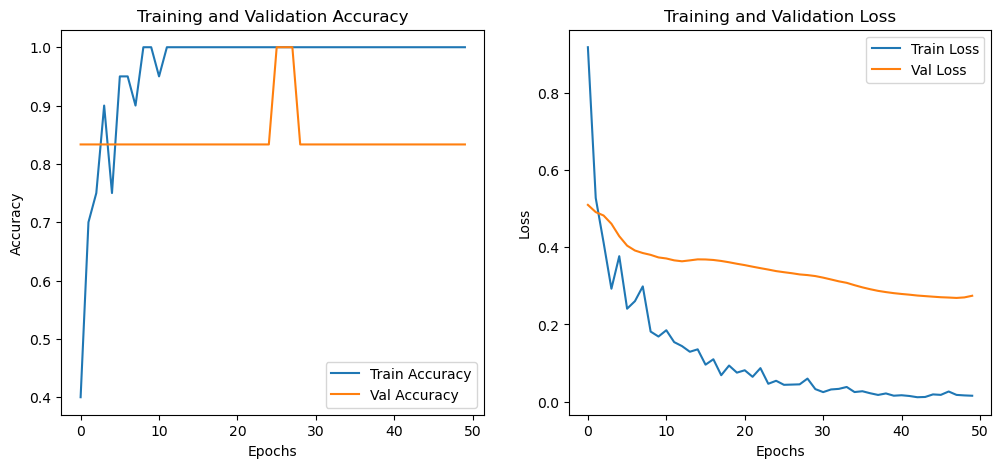

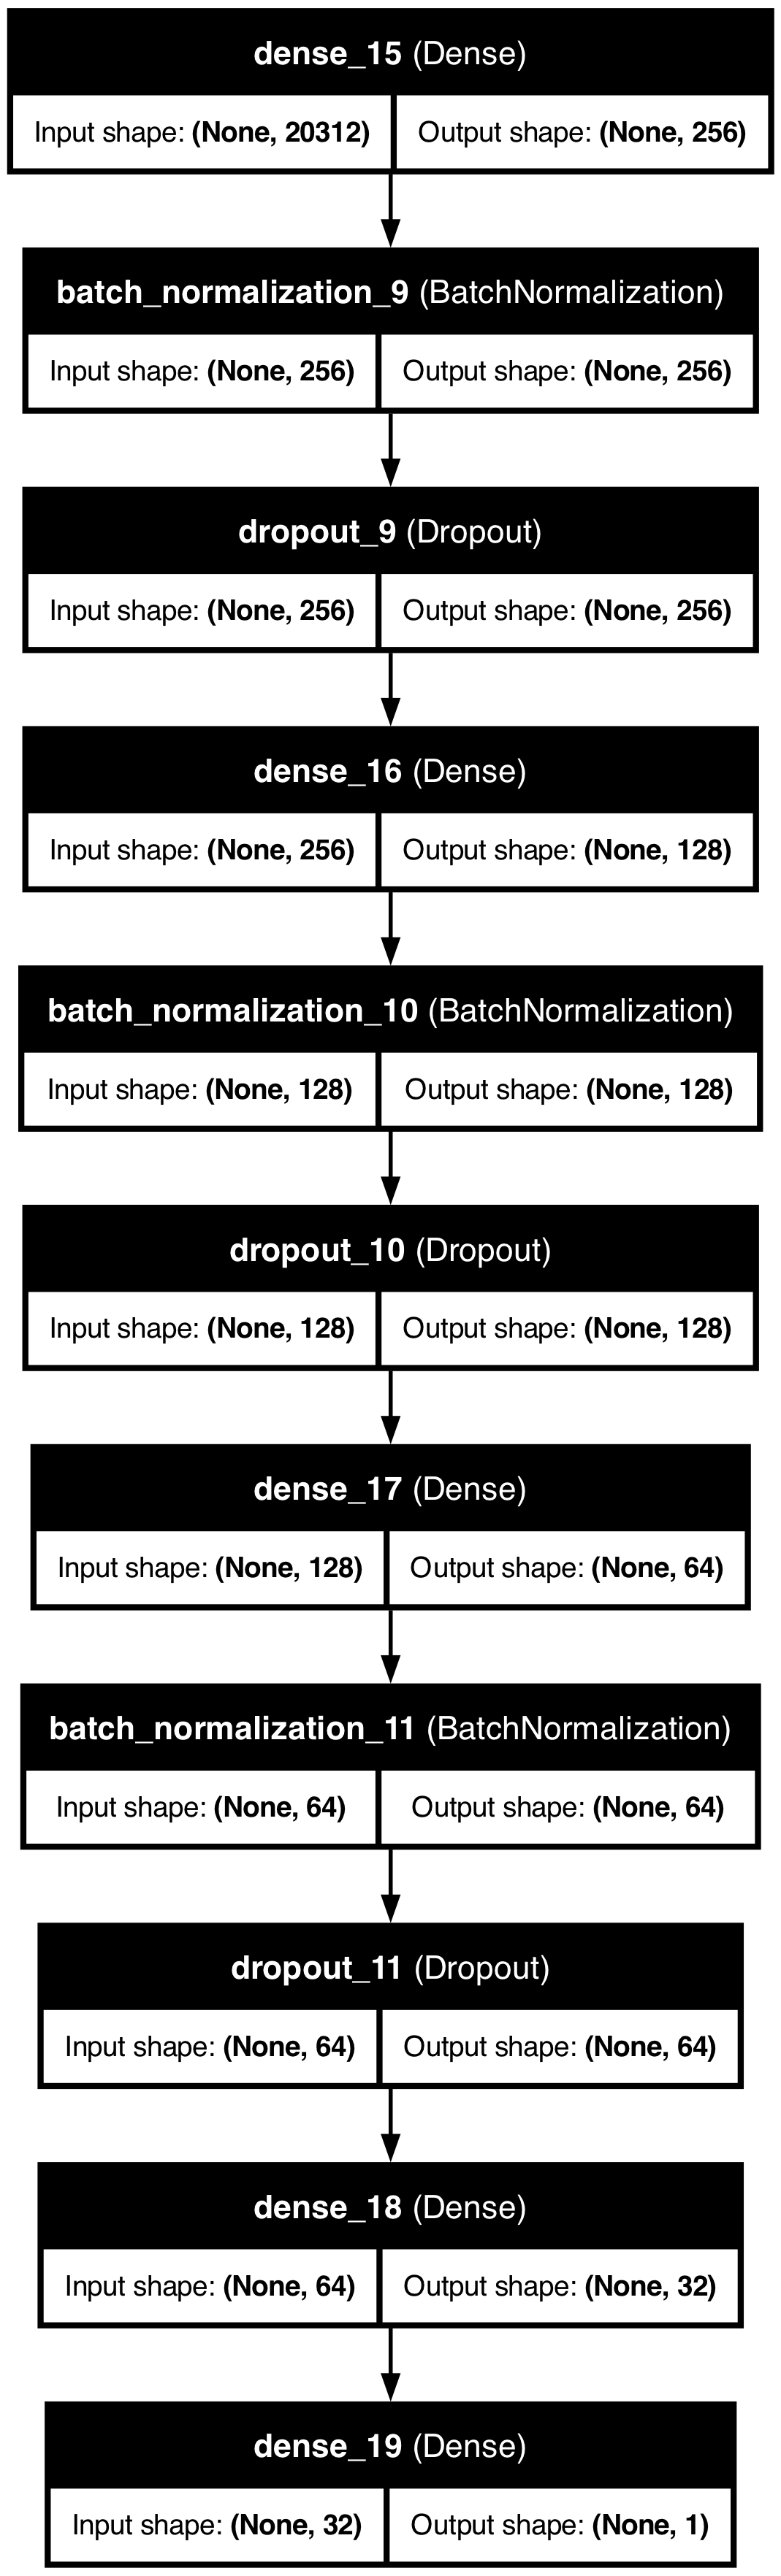

In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt

# Step 1: Load the CSV files
csv12 = '/Users/schoudhry/Desktop/IIT/Research/researchData/StableS12.csv'
csv13 = '/Users/schoudhry/Desktop/IIT/Research/researchData/Stable13.csv'
csv1 = '/Users/schoudhry/Desktop/IIT/Research/researchData/Stable1.csv'

# Load gene expression (S12), bacterial abundance (S13), and tumor/no tumor labels (S1)
data_s12 = pd.read_csv(csv12)
data_s13 = pd.read_csv(csv13)
data_s1 = pd.read_csv(csv1)

# Step 2: Extract relevant columns for B01 to B26
patients = [f'B{str(i).zfill(2)}' for i in range(1, 27)]  # B01 to B26

genes_data = data_s12[['Unnamed: 0'] + patients].rename(columns={'Unnamed: 0': 'Gene'})  # Gene expression
bacteria_data = data_s13[['Unnamed: 0'] + patients].rename(columns={'Unnamed: 0': 'Bacteria'})  # Bacterial abundance

# Step 3: Prepare the tumor/normal labels based on 'Tissue.RNA.DNA_Tube_ID' and 'Description' from csv1
crc_status = data_s1[['Tissue.RNA.DNA_Tube_ID', 'Description']]  # Select the relevant columns

# Convert the 'Tissue.RNA.DNA_Tube_ID' to match B01, B02 format
crc_status['Tissue.RNA.DNA_Tube_ID'] = crc_status['Tissue.RNA.DNA_Tube_ID'].str.replace(' ', '')

# Filter crc_status for B01 to B26
crc_status = crc_status[crc_status['Tissue.RNA.DNA_Tube_ID'].isin(patients)]

# Convert 'Description' to binary labels: 1 for tumor, 0 for normal using .loc to avoid the warning
crc_status.loc[:, 'CRC_Status'] = crc_status['Description'].apply(lambda x: 1 if x == 'tumor' else 0)

# Step 4: Merge gene, bacteria, and CRC status data for all patients (B01 to B26)
merged_data = pd.concat([genes_data.set_index('Gene').T, bacteria_data.set_index('Bacteria').T], axis=1)

# Step 5: Merge with CRC status based on matching the patient IDs
crc_status.index = crc_status['Tissue.RNA.DNA_Tube_ID']  # Set patient IDs as index
merged_data = merged_data.merge(crc_status.set_index('Tissue.RNA.DNA_Tube_ID'), left_index=True, right_index=True)

# Step 6: Convert all columns to numeric, forcing errors to NaN (ignoring non-numeric data)
merged_data = merged_data.apply(pd.to_numeric, errors='coerce')

# Step 7: Check for any remaining non-numeric or NaN values and handle missing values
print("Checking for NaN values in the dataset...")
print(merged_data.isnull().sum())  # Check for NaN values

# Handle missing values (fill NaNs with 0 or use a different strategy)
merged_data.fillna(0, inplace=True)

# Step 8: Prepare the input features (X) and target (y) excluding the 'Description' column
X = merged_data.drop(columns=['CRC_Status', 'Description']).values  # Features: gene and bacterial data
y = merged_data['CRC_Status'].values  # Target: CRC status (tumor or no tumor)

# Step 9: Normalize the data (optional but recommended)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 10: Convert everything to float32 (TensorFlow expects float32 data types)
X_scaled = X_scaled.astype(np.float32)
y = y.astype(np.float32)

# Step 11: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 12: Define the neural network model
model = tf.keras.Sequential([
    layers.InputLayer(input_shape=(X_train.shape[1],)),  # Input layer

    # First Dense Layer
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),  # Batch normalization for stable learning
    layers.Dropout(0.3),  # Dropout to prevent overfitting

    # Second Dense Layer
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    # Third Dense Layer
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),

    # Fourth Dense Layer
    layers.Dense(32, activation='relu'),

    # Output Layer (sigmoid for binary classification)
    layers.Dense(1, activation='sigmoid')
])

# Step 13: Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 14: Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Step 15: Visualize the model architecture using plot_model
plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)

# Step 16: Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Step 17: Plot training history (accuracy and loss)
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.show()

# Step 18: Display the saved model plot
from IPython.display import Image
Image('model_architecture.png')  # Show the saved model plot

# Epoch documentation needs filtered updating 